https://towardsdatascience.com/incremental-online-learning-with-scikit-multiflow-6b846913a50b

https://scikit-multiflow.github.io/scikit-multiflow/index.html

# Datastream

In [1]:
from skmultiflow.data import SEAGenerator

In [3]:
stream = SEAGenerator() 

stream.prepare_for_use()

In [4]:
X , y = stream.next_sample()

In [5]:
print( X )

[[0.23127268 7.63123412 9.66686127]]


In [6]:
print( y )

[0]


### Générer un flux de données à partir d'un dataframe pandas :

https://scikit-multiflow.github.io/scikit-multiflow/skmultiflow.data.data_stream.html

# Incremental model : Hoeffding Trees

In [7]:
from skmultiflow.trees import HoeffdingTree

In [8]:
tree = HoeffdingTree()

In [11]:
n_iters = 100

correctness_dist = []

for i in range( n_iters ):
    
    X , y = stream.next_sample()
        
    y_pred = tree.predict(X)       
    
    if y == y_pred :
        correctness_dist.append(1)
    else:
        correctness_dist.append(0)   
   
    tree.partial_fit( X , y )            

In [15]:
import numpy as np

np.mean( correctness_dist )

0.89

In [19]:
import matplotlib.pyplot as plt

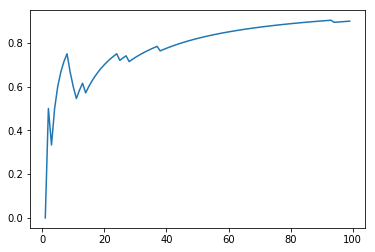

In [22]:
# Evolution Accuracy dans le temps :

t = [ i for i in range( 1 , n_iters ) ]

accuracy_t = [ sum(correctness_dist[ : i ] ) / len( correctness_dist[ : i ] ) for i in range( 1 , n_iters )]

plt.plot( t , accuracy )

In [21]:
print( accuracy )

[0.0, 0.5, 0.3333333333333333, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.75, 0.6666666666666666, 0.6, 0.5454545454545454, 0.5833333333333334, 0.6153846153846154, 0.5714285714285714, 0.6, 0.625, 0.6470588235294118, 0.6666666666666666, 0.6842105263157895, 0.7, 0.7142857142857143, 0.7272727272727273, 0.7391304347826086, 0.75, 0.72, 0.7307692307692307, 0.7407407407407407, 0.7142857142857143, 0.7241379310344828, 0.7333333333333333, 0.7419354838709677, 0.75, 0.7575757575757576, 0.7647058823529411, 0.7714285714285715, 0.7777777777777778, 0.7837837837837838, 0.7631578947368421, 0.7692307692307693, 0.775, 0.7804878048780488, 0.7857142857142857, 0.7906976744186046, 0.7954545454545454, 0.8, 0.8043478260869565, 0.8085106382978723, 0.8125, 0.8163265306122449, 0.82, 0.8235294117647058, 0.8269230769230769, 0.8301886792452831, 0.8333333333333334, 0.8363636363636363, 0.8392857142857143, 0.8421052631578947, 0.8448275862068966, 0.847457627118644, 0.85, 0.8524590163934426, 0.8548387096774194, 0.

# Alternative Approach with Scikit-Multiflow

In [39]:
from skmultiflow.data import SEAGenerator

from skmultiflow.evaluation import EvaluatePrequential

In [40]:
n_iters = 100

evaluator = EvaluatePrequential( show_plot = True , max_samples = n_iters , metrics = [ 'accuracy' ] )

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
Processed samples: 200
Mean performance:


TypeError: 'NoneType' object is not subscriptable

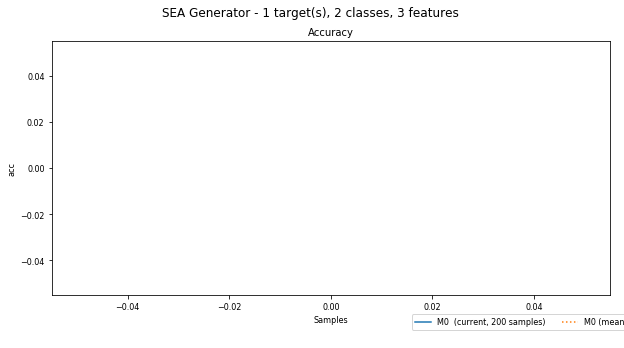

In [42]:
stream = SEAGenerator() 

stream.prepare_for_use()

tree = HoeffdingTree()

evaluator.evaluate( stream = stream , model = tree )